In [2]:
import pandas as pd
from sqlite3 import connect
pd.options.display.max_rows = 10

In [3]:
sumo = pd.read_csv("data/results.csv", dtype={'basho': 'string', 'day': 'string', 'rikishi1_id': 'int64', 'rikishi1_rank': 'string', 'rikishi1_shikona': 'string', 'rikishi1_result': 'string', 'rikishi1_win': 'int64', 'kimarite': 'string', 'rikishi2_id': 'int64', 'rikishi2_rank': 'string', 'rikishi2_shikona': 'string', 'rikishi2_result': 'string', 'rikishi2_win': 'string'})
sumo

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1
1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0
2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0
3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1
4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227767,2023.07,15,11985,S1w,Daieisho,9-6,0,hikiotoshi,11855,M9e,Takanosho,8-7,1
227768,2023.07,15,12451,S1e,Hoshoryu,12-3,1,uwatenage,12796,M17w,Hakuoho,11-4,0
227769,2023.07,15,12796,M17w,Hakuoho,11-4,0,uwatenage,12451,S1e,Hoshoryu,12-3,1
227770,2023.07,15,12094,K1w,Abi,6-9,1,yorikiri,12231,O1w,Kirishima,6-7-2,0


In [8]:
banzuke = pd.read_csv("banzuke.csv", dtype={'basho': 'string', 'day': 'string', 'rikishi1_id': 'int64', 'rikishi1_rank': 'string', 'rikishi1_shikona': 'string', 'rikishi1_result': 'string', 'rikishi1_win': 'int64', 'kimarite': 'string', 'rikishi2_id': 'int64', 'rikishi2_rank': 'string', 'rikishi2_shikona': 'string', 'rikishi2_result': 'string', 'rikishi2_win': 'string'})
banzuke.head()


,basho,id,rank,rikishi,heya,shusshin,birth_date,height,weight,prev,prev_w,prev_l
0,1983.01,1354,Y1e,Chiyonofuji,Kokonoe,Hokkaido,1955-06-01,182.0,116.0,Y1e,14.0,1.0
1,1983.01,4080,Y1w,Kitanoumi,Mihogaseki,Hokkaido,1953-05-16,179.0,165.0,Y2eHD,9.0,3.0
2,1983.01,4095,Y2eHD,Wakanohana,Futagoyama,Aomori,1953-04-03,186.0,133.0,Y1w,0.0,0.0
3,1983.01,4104,O1e,Takanosato,Futagoyama,Aomori,1952-09-29,181.0,144.0,O1e,10.0,5.0
4,1983.01,4112,O1w,Kotokaze,Sadogatake,Mie,1957-04-26,183.0,163.0,O1w,10.0,5.0


In [9]:
connection = connect(':memory:')
sumo.to_sql("sumo", connection)
banzuke.to_sql("banzuke", connection)
def sql(a_string):
    return(pd.read_sql(a_string, connection))

In [10]:
pd.read_sql("SELECT rikishi1_id, rikishi1_shikona FROM sumo", connection)

,rikishi1_id,rikishi1_shikona
0,4140,Chikubayama
1,4306,Ofuji
2,1337,Tochitsukasa
3,4323,Shiraiwa
4,4097,Tamakiyama
...,...,...
227767,11985,Daieisho
227768,12451,Hoshoryu
227769,12796,Hakuoho
227770,12094,Abi


In [11]:
sql("""SELECT id, 
    rikishi FROM banzuke""")

,id,rikishi
0,1354,Chiyonofuji
1,4080,Kitanoumi
2,4095,Wakanohana
3,4104,Takanosato
4,4112,Kotokaze
...,...,...
177873,12833,Shiroma
177874,12734,Oyamazakura
177875,12631,Sadanojo
177876,2905,Higohikari


In [12]:
sql("""SELECT sumo.rikishi1_id AS 'id', sumo.rikishi1_shikona, banzuke.rikishi as 'rikishi', 
    sumo.rikishi1_rank AS 'rank', banzuke.weight AS 'weight'
    FROM sumo 
    JOIN banzuke 
    ON sumo.rikishi1_shikona = banzuke.rikishi 
    AND sumo.basho = banzuke.basho""")

,id,rikishi1_shikona,rikishi,rank,weight
0,4140,Chikubayama,Chikubayama,J13w,115.0
1,4306,Ofuji,Ofuji,Ms1e,145.0
2,1337,Tochitsukasa,Tochitsukasa,J12w,130.0
3,4323,Shiraiwa,Shiraiwa,J13e,103.0
4,4097,Tamakiyama,Tamakiyama,J12e,134.0
...,...,...,...,...,...
227938,11985,Daieisho,Daieisho,S1w,161.0
227939,12451,Hoshoryu,Hoshoryu,S1e,131.0
227940,12796,Hakuoho,Hakuoho,M17w,156.0
227941,12094,Abi,Abi,K1w,149.0


In [13]:
combined_sql_query = pd.read_sql_query("""SELECT sumo.rikishi1_id AS 'id', sumo.rikishi1_shikona, banzuke.rikishi as 'rikishi', 
    sumo.rikishi1_rank AS 'rank', banzuke.weight AS 'weight'
    FROM sumo 
    JOIN banzuke 
    ON sumo.rikishi1_shikona = banzuke.rikishi 
    AND sumo.basho = banzuke.basho""", connection)

combined_sql_query
combined_df = pd.DataFrame(combined_sql_query)
combined_df = combined_df.drop(['rikishi1_shikona'], axis=1)
combined_df


,id,rikishi,rank,weight
0,4140,Chikubayama,J13w,115.0
1,4306,Ofuji,Ms1e,145.0
2,1337,Tochitsukasa,J12w,130.0
3,4323,Shiraiwa,J13e,103.0
4,4097,Tamakiyama,J12e,134.0
...,...,...,...,...
227938,11985,Daieisho,S1w,161.0
227939,12451,Hoshoryu,S1e,131.0
227940,12796,Hakuoho,M17w,156.0
227941,12094,Abi,K1w,149.0


In [41]:
combined_df.loc[combined_df.rikishi == 'Takamisakari']
combined_df.loc[combined_df.weight == 130]
combined_df.loc[combined_df.rikishi.str.contains('Koto')]
# combined_df.loc[combined_df.rank.str.contains == 'Y']

# combined_df["rank"] = combined_df["rank"].astype(str)
combined_df["rank"].dtype
# combined_df.loc[combined_df.rank == 'Ms1e']

dtype('O')

In [15]:
sql_query = pd.read_sql_query("""SELECT sumo.rikishi1_id AS 'id', sumo.rikishi1_shikona, banzuke.rikishi, 
    sumo.rikishi1_rank AS 'rank', banzuke.weight
    FROM sumo 
    JOIN banzuke 
    ON sumo.rikishi1_shikona = banzuke.rikishi 
    AND sumo.basho = banzuke.basho
    WHERE sumo.rikishi1_shikona="Tobizaru"
    """, connection)


df = pd.DataFrame(sql_query)
# df.drop(['A'], axis=1)
df_xxx = df.drop(['rikishi1_shikona'], axis=1)
df_xxx

,id,rikishi,rank,weight
0,12203,Tobizaru,J14w,110.0
1,12203,Tobizaru,J14w,110.0
2,12203,Tobizaru,J14w,110.0
3,12203,Tobizaru,J14w,110.0
4,12203,Tobizaru,J14w,110.0
...,...,...,...,...
437,12203,Tobizaru,M1w,131.0
438,12203,Tobizaru,M1w,131.0
439,12203,Tobizaru,M1w,131.0
440,12203,Tobizaru,M1w,131.0


In [16]:
print(xxx.to_string())


NameError: name 'xxx' is not defined

<Axes: >

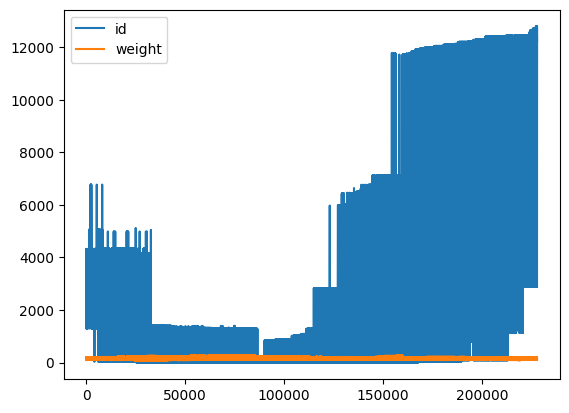

In [27]:
import matplotlib
combined_df.plot()

<Axes: >

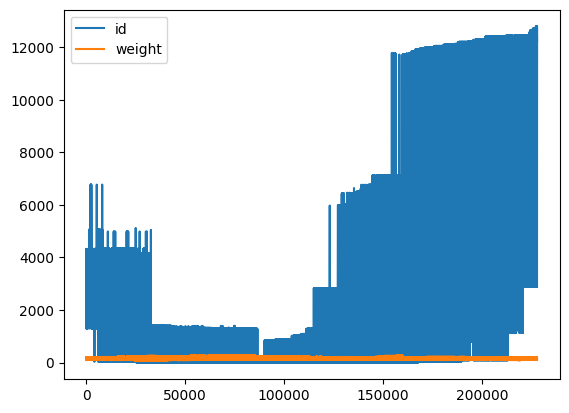

In [25]:
combined_df.loc[combined_df.rikishi1_id == 1111]

AttributeError: 'DataFrame' object has no attribute 'rikishi1_id'